# Water Quality Analysis - Group5 Project


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data_csv = './water_potability.csv'
df = pd.read_csv(data_csv)


In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.shape

(3276, 10)

In [6]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [7]:
df = df.fillna(df.mean())

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There were so many null values in the original data set provided, instead of dropping the null values, I decided to replace them with the mean values of the column.

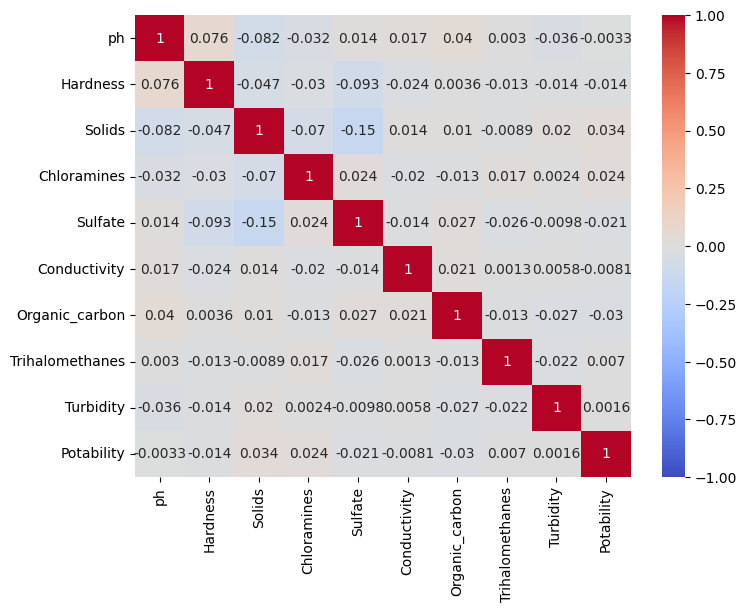

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

In [10]:
X = df.drop('Potability', axis=1)  # Features (independent variables)
y = df['Potability']  # Target (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data

scaler.fit(X)
# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data (using the same scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)

# **Vanilla Model Implementation**
This section covers the implementation of the vanilla model that involves training the model using a plain architecture

In [12]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# Define the vanilla neural network model
vanilla_model = Sequential()

# Input layer and first hidden layer (64 units, ReLU activation)
vanilla_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer (32 units, ReLU activation)
vanilla_model.add(Dense(32, activation='relu'))

# Output layer (1 unit, Sigmoid activation for binary classification)
vanilla_model.add(Dense(1, activation='sigmoid'))

# Show model summary to check the architecture
vanilla_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
vanilla_model.compile(loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])


In [15]:
# Train the model
history_vanilla = vanilla_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                                    validation_split=0.2, verbose=1)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - AUC: 0.4971 - Precision: 0.3949 - Recall: 0.1135 - accuracy: 0.5783 - loss: 0.6848 - val_AUC: 0.6139 - val_Precision: 0.6757 - val_Recall: 0.2415 - val_accuracy: 0.6546 - val_loss: 0.6556
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6374 - Precision: 0.6701 - Recall: 0.1717 - accuracy: 0.6481 - loss: 0.6427 - val_AUC: 0.6599 - val_Precision: 0.7317 - val_Recall: 0.2899 - val_accuracy: 0.6775 - val_loss: 0.6353
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.6847 - Precision: 0.6670 - Recall: 0.2711 - accuracy: 0.6587 - loss: 0.6248 - val_AUC: 0.6798 - val_Precision: 0.7097 - val_Recall: 0.3188 - val_accuracy: 0.6794 - val_loss: 0.6233
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7134 - Precision: 0.7196 - Recall: 0.3666 - accuracy: 0.6803 - loss: 0.6109 - val_AUC: 0.6924 - val_Precision: 0.6794 - val_Recall: 0.4300 - val_accuracy: 0.6947 - val_loss: 0.6141
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━

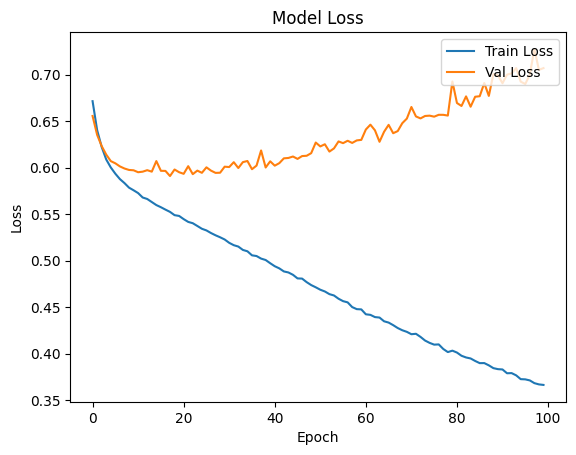

In [16]:
# Plot training & validation loss
plt.plot(history_vanilla.history['loss'], label='Train Loss')
plt.plot(history_vanilla.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_auc = vanilla_model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the test results
print(f'Vanilla Model Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print(f'Vanilla Model Test Precision: {test_precision}')
print(f'Vanilla Model Test Recall: {test_recall}')
print(f'Vanilla Model Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6349 - Precision: 0.4914 - Recall: 0.4637 - accuracy: 0.6370 - loss: 0.7984 
Vanilla Model Test Accuracy: 0.6356707215309143
Test Loss: 0.7763383388519287
Vanilla Model Test Precision: 0.5104602575302124
Vanilla Model Test Recall: 0.5
Vanilla Model Test AUC: 0.6522759795188904


In [18]:
# Save the trained model using Keras save method
vanilla_model.save('vanilla_model.h5')


# **L1 Regularization!**

In [19]:
from tensorflow.keras.regularizers import l1 #importing l1 for regularization


l1_model = Sequential()

# Adding L1 regularization to the layers
# Input layer and first hidden layer
l1_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=l1(0.001)))

# Second hidden layer
l1_model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))


# Output layer
l1_model.add(Dense(1, activation='sigmoid'))

l1_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
l1_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC']) #compiling the model
l1_early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights
)
# Train the model
l1_model_fitted = l1_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
             callbacks=[l1_early_stopping], verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - AUC: 0.4513 - Precision: 0.2787 - Recall: 0.0127 - accuracy: 0.6049 - loss: 1.0041 - val_AUC: 0.5547 - val_Precision: 0.6667 - val_Recall: 0.0097 - val_accuracy: 0.6069 - val_loss: 0.9488
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5999 - Precision: 0.8316 - Recall: 0.0267 - accuracy: 0.6162 - loss: 0.9260 - val_AUC: 0.6095 - val_Precision: 0.8750 - val_Recall: 0.0676 - val_accuracy: 0.6279 - val_loss: 0.8913
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6656 - Precision: 0.7540 - Recall: 0.0634 - accuracy: 0.6205 - loss: 0.8668 - val_AUC: 0.6400 - val_Precision: 0.8108 - val_Recall: 0.1449 - val_accuracy: 0.6489 - val_loss: 0.8447
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6678 - Precision: 0.7633 - Recall: 0.1833 - accuracy: 0.6488 - loss: 0.8271 - val_AUC: 0.6428 - val_Precision: 0.8293 - val_Recall: 0.1643 - val_accuracy: 0.6565 - val_loss: 0.8129
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
l1_model.save('l1_water_quality_model.h5') #saving my model

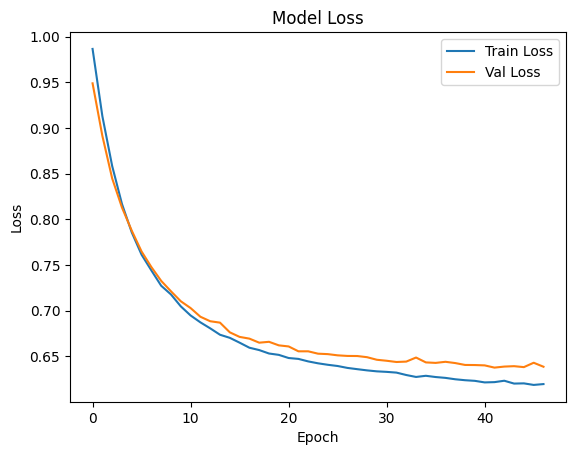

In [22]:
# plotting training & validation loss
plt.plot(l1_model_fitted.history['loss'], label='Train Loss')
plt.plot(l1_model_fitted.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [23]:
# Evaluate the model on the test set
loss, test_accuracy, test_precision, test_recall, test_auc = l1_model.evaluate(X_test_scaled, y_test, verbose=1)

# test results
print(f'L1 Model Test Accuracy: {test_accuracy}')
print(f'Test Loss: {loss}')
print(f'L1 Model Test Precision: {test_precision}')
print(f'L1 Test Recall: {test_recall}')
print(f'L1 Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6861 - Precision: 0.5969 - Recall: 0.3468 - accuracy: 0.6827 - loss: 0.6301 
L1 Model Test Accuracy: 0.6829268336296082
Test Loss: 0.6328526735305786
L1 Model Test Precision: 0.6285714507102966
L1 Test Recall: 0.3606557250022888
L1 Test AUC: 0.6949506998062134


Even with L1 regularization, the model is not doing very great


# L2 Regularization


This section implements L2 regularization technique with an aim of improving our model's performance(higher accuracy, lower loss) as compared to the vanilla model and using L1 regularization.

In [24]:
from tensorflow.keras.regularizers import l2



l2_model = Sequential()

# Adding L2 regularization to the layers
# Input layer and first hidden layer
l2_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],),
                   kernel_regularizer=l2(0.01)))

# Second hidden layer
l2_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
l2_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

# Compile the model with additional metrics
l2_model.compile(optimizer=
                 optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC']) #compiling the model

l2_early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,
    restore_best_weights=True  # Restore the best weights
)

# Train the model
l2_model_fitted = l2_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,
                               callbacks=[l2_early_stopping], verbose=1)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - AUC: 0.5312 - Precision: 0.4657 - Recall: 0.2385 - accuracy: 0.5829 - loss: 1.2156 - val_AUC: 0.5627 - val_Precision: 0.8889 - val_Recall: 0.0386 - val_accuracy: 0.6183 - val_loss: 1.0369
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.5913 - Precision: 0.7132 - Recall: 0.0488 - accuracy: 0.6349 - loss: 0.9834 - val_AUC: 0.5981 - val_Precision: 0.8077 - val_Recall: 0.1014 - val_accuracy: 0.6355 - val_loss: 0.8929
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6438 - Precision: 0.7023 - Recall: 0.1176 - accuracy: 0.6268 - loss: 0.8620 - val_AUC: 0.6210 - val_Precision: 0.7273 - val_Recall: 0.1159 - val_accuracy: 0.6336 - val_loss: 0.8077
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6626 - Precision: 0.7038 - Recall: 0.1385 - accuracy: 0.6337 - loss: 0.7863 - val_AUC: 0.6458 - val_Precision: 0.7500 - val_Recall: 0.1594 - val_accuracy: 0.6469 - val_loss: 0.7549
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━

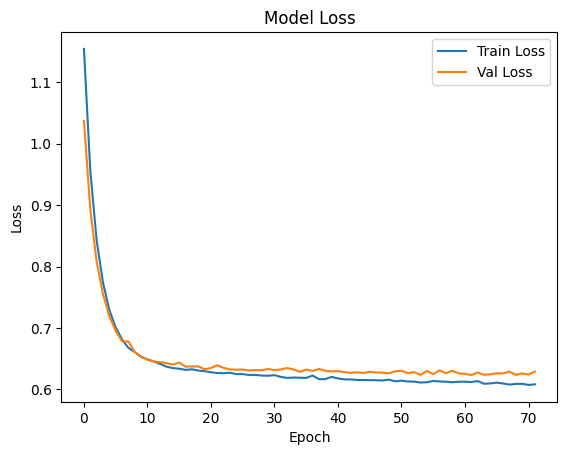

In [25]:
# Plot training & validation loss
plt.plot(l2_model_fitted.history['loss'], label='Train Loss')
plt.plot(l2_model_fitted.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Evaluate the model on the test set
loss, test_accuracy, test_precision, test_recall, test_auc = l2_model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the test results
print(f'L2 Model Test Accuracy: {test_accuracy}')
print(f"Test Loss: {loss}")
print(f'L2 Model Test Precision: {test_precision}')
print(f'L2 Test Recall: {test_recall}')
print(f'L2 Test AUC: {test_auc}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.6994 - Precision: 0.6181 - Recall: 0.3224 - accuracy: 0.6865 - loss: 0.6136 
L2 Model Test Accuracy: 0.6875
Test Loss: 0.6156668663024902
L2 Model Test Precision: 0.6535432934761047
L2 Test Recall: 0.3401639461517334
L2 Test AUC: 0.7017994523048401


In [27]:
# saving our model using pickle
import pickle
pickle.dump(l2_model, open('l2_model.pkl', 'wb'))

# Error Analysis

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate error metrics
def error_analysis(model, X_test_scaled, y_test):
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    return predictions

# Error analysis for Vanilla Model
print("Vanilla Model Error Analysis")
vanilla_predictions = error_analysis(vanilla_model, X_test_scaled, y_test)

# Error analysis for L1 Model
print("L1 Model Error Analysis")
l1_predictions = error_analysis(l1_model, X_test_scaled, y_test)

# Error analysis for L2 Model
print("L2 Model Error Analysis")
l2_predictions = error_analysis(l2_model, X_test_scaled, y_test)



Vanilla Model Error Analysis
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.25167765220256344
Mean Absolute Error (MAE): 0.39953903147488745
Root Mean Squared Error (RMSE): 0.5016748470897893
L1 Model Error Analysis
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.20373077761185807
Mean Absolute Error (MAE): 0.4076598870125031
Root Mean Squared Error (RMSE): 0.4513654590371953
L2 Model Error Analysis
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 0.20260836928375472
Mean Absolute Error (MAE): 0.41008201313046055
Root Mean Squared Error (RMSE): 0.4501203942099877
